In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps

# Sparse VS. Dense matrices

Today, we are going to learn about sparse matrices

One of the most popular (but by the far not the only one) use of sparse matrices is in the numerical analysis of partial differential equations. We are going to study the 1D version of the Laplace and Poisson equations:

Find $u(x)$ for $x\in (0,1)$ solving

$$ \begin{array}{ll} u''(x) & = f(x) \text{ for } x \in (0,1) \\
u(x) & = g(x) \text{ for } x \in \{0,1\}
\end{array}$$  

In [2]:
# Create my approximation to (0,1)
# by setting a discrete step size

h = 1e-3 # Stepsize 
x = np.arange(0,1,h) # An array containing a discrete subset of (0,1) of points placed h apart

What we are going to do is to generate a $n\times n$ matrix approximating the second derivative operator $u\mapsto u''$

For this it is convenient to use a new object called a sparse matrix, and these are objects of several kinds brought by the scipy.sparse package

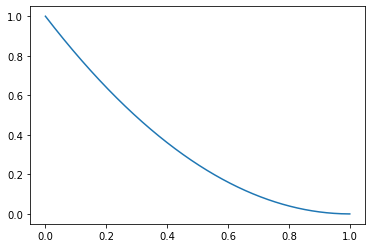

In [3]:
# Last time, we explained how component wise operations on
# the array x allows us to create functions (or rather, discrete approximations)
# to functions

#Example 1
y = x**2-2*x+1
plt.plot(x,y)

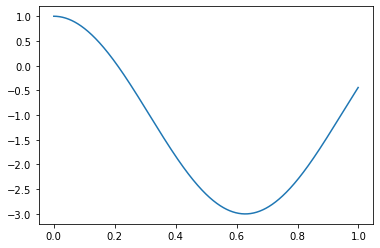

In [4]:
#Example 2
y = 2*np.cos(5*x)-1
plt.plot(x,y)

We are going to solve first the following concrete problem

$$ \begin{array}{rl} u''(x) = -1  & \text{ in } (0,1) \\ u(x) = 0\;\;\; & \text{ if } x= 0,1\end{array}$$

We are going to approximate this and reduce it to a system of the form

$$ Az = b$$

For a well chosen matrix $A$ and vector $b$, and ultimately, the entries of the vector $z$ will approximate the values of the solution $u(x)$ at the points $x= 0,h,2h,\ldots,1-h$ which approximates the interval $(0,1)$.

The basis for this is the well known discrete approximation for the second derivative operator, which follows from the Taylor expansion, namely: if $u$ is a twice differentiable function in $(0,1)$, then for any $x\in (0,1)$

$$ \frac{u(x+\delta) + u(x-\delta) -2u(x)}{\delta^2} = u''(x) + o(1) \text{ as } \delta \to 0$$ 

Written differently

$$\frac{(u(x+\delta)-u(x))-(u(x)-u(x-\delta))}{\delta^2} =\frac{u(x+\delta) + u(x-\delta) -2u(x)}{\delta^2} = u''(x) + o(1) \text{ as } \delta \to 0$$ 

Based on this, we seek to solve now, not for $u$, but for a discrete version of $u$ defined only at the 'grid points' $0,h,2h,\ldots,1-h$, as follows: 

$$\text{I want } z_k \text{ to approximate the value } u(kh) \text{ for } k =0,\ldots,n$$ 

where $n$ is the number of grid points (e.g. if $h=1/100$, then $n=100$). The vector $z$ will be defined by the following system of equations

$$\begin{array}{rl} (z_{k+1}+z_{k-1}-2z_{k})/(h^2) = -1 & \text { if } k =2,3,\ldots,n-1  \\ 
z_k = 0 & \text { if } k=1,n \end{array}$$ 

As we will see, there is exactly one vector solving this and it will indeed approximate our function $u$

In [5]:
# We are going to build a matrix A and a vector b that will codify the last system
# of equations, remember n will be the number of unknowns, and we want to be equal
# to the length of the array x defined above

n = len(x)

In [34]:
# First, we define the right hand side, which we call b
b = np.ones(n)
b[0] = 0
b[n-1] = 0
b = -b

# Now for the matrix, we will do it two ways: as a dense matrix,
# and as sparse matrix

#########################
# Dense matrix approach #
######################### 

# First, we create a matrix comprised entirely
# of zeros, and in the desired shape n x n:
A_d = np.zeros((n,n))

# Now we do a loop to assign the non-zero values
for k in range(1,n-1):
    A_d[k,k] = -2
    A_d[k,k+1] = 1
    A_d[k,k-1] = 1    

A_d = A_d *(1/(h**2))
A_d[0,0] = 1
A_d[n-1,n-1] = 1

[[ 1000000.        0.        0. ...        0.        0.        0.]
 [ 1000000. -2000000.  1000000. ...        0.        0.        0.]
 [       0.  1000000. -2000000. ...        0.        0.        0.]
 ...
 [       0.        0.        0. ... -2000000.  1000000.        0.]
 [       0.        0.        0. ...  1000000. -2000000.  1000000.]
 [       0.        0.        0. ...        0.        0.  1000000.]]

We can also print a portion of the matrix:

[[ 1000000.        0.        0.        0.        0.]
 [ 1000000. -2000000.  1000000.        0.        0.]
 [       0.  1000000. -2000000.  1000000.        0.]
 [       0.        0.  1000000. -2000000.  1000000.]
 [       0.        0.        0.  1000000. -2000000.]]

We can also use pyplot



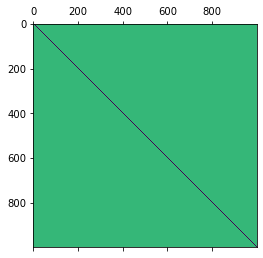

In [7]:
# Let's check our work by visualizing the matrix A_d

# One way is by printing it


print(A_d)

# Or by printing a sample of it

print('')
print('We can also print a portion of the matrix:')
print('')

print(A_d[:5,:5])

# One more way to visualize A_d is through
# pyplot's matshow function

print('')
print('We can also use pyplot')
print('')


plt.matshow(A_d)




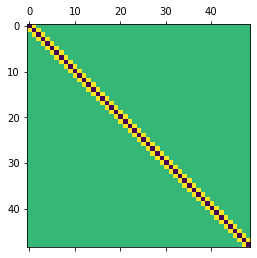

In [8]:
# Let's see matshow in a smaller size matrix

plt.matshow(A_d[1:50,1:50])

The largest error is 0.0004995000000000005
this being with a step size h=0.001


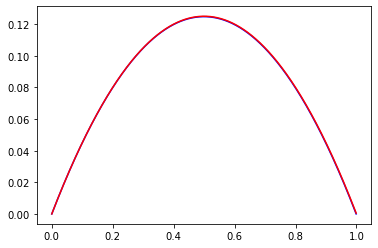

In [9]:
# To solve the equation we could use the numpy.linalg library solver

z = np.linalg.solve(A_d,b)

# and now we plot it:

plt.plot(x,z,color='blue')

# and let's compare it with the real solution

z_real = 0.5*x*(1-x)
plt.plot(x,z_real,color='red')

# and lastly, let's compute the maximum error between the real solution
# and the computed solution

# This computs the largest absolue error between z and z_real:
error = np.max(np.abs(z-z_real))

print('The largest error is '+str(error))
print('this being with a step size h='+str(h))


In [51]:
#########################
# Sparse matrix approach #
######################### 

h = 1e-6
x = np.arange(0,1,h)
n = len(x)

# I initialize the matrix A_s
# first, we will work with one of the many variable 
# types that scipy.sparse uses to create sparse matrices,
# that is the 'Dictionary of Keys' (DOK) format

# Initializes a nxn sparse matrix
A_s = sps.dok_matrix((n,n))

# A_s is basically a dictionary

for k in range(1,len(x)-1):
    A_s[k,k] = -2/(h**2)
    A_s[k,k+1] = 1/(h**2)
    A_s[k,k-1] = 1/(h**2)
    
A_s[0,0] = 1
A_s[n-1,n-1] = 1


In [52]:
b = np.ones(n)
b[0] = 0
b[n-1] = 0
b = -b

In [55]:
# and can in principle create a dense matrix from here on

A_d2 = A_s.todense()
np.max(np.abs(A_d-A_d2))

# This shows even if we want to work with a dense matrix type
# it is convenient sometimes to build it first as a sparse
# and then use .todense() to make it dense

# Also if I want to use pyplot's matshow:

plt.matshow(A_d2)

In [56]:
# Now we are ready to solve our problem with the sparse format

from scipy.sparse import linalg as spla

# spla has a function called sp_solve that will solve our problem

z_s = spla.spsolve(A_s.tocsr(),b)

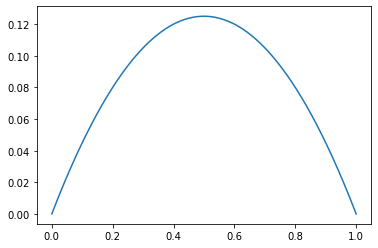

In [57]:
plt.plot(x,z_s)
z_real = (0.5)*x*(1-x)

In [66]:
error = np.max(np.abs(z_s-z_real))
rel_error = np.max(np.abs((z_s-z_real)/(z_real+1e-1)))
print('The error is '+str(error))
print('The relative error is '+str(rel_error))


The error is 4.999995000143778e-07
The relative error is 4.999970000318776e-06
